1. ML문제
 * 분류, 예측 문제로 구분
 * 분류문제는 binary classification, multi-label classification
 * 예측문제는 regression, NN 등

2. 파생변수
 * 기존 피쳐를 가공하여 새로운 피쳐를 생성했을 때의 변수 / 명목형변수(구간)
 * ex) 나이 피쳐: 5 -> 가공 -> 유아(0)  /  9 -> 가공 -> 소아(1)  /  13 -> 가공 -> 청소년(2)

3. 사용하게 될 도구
 * 시각화 도구: matplotlib.seaborn 등
 * 데이터분석 도구: pandas, numpy
 * 모델링 도구: sklearn

4. 분석 절차


1) 데이터 로드&확인
    - 데이터 구성
    - 데이터 정제 여부
    - NaN(null)확인 -> 대체(어떤값으로 대체 할 것인가?)
      - ex) 타이타닉'나이'가 NaN값이 포함되어 있는데, 삭제 or 평균 or 중앙값 or 선형회귀분석(예측) or knn 등 머신러닝 알고리즘으로 예측 ...
    
    
2) 탐색적 데이터 분석(EDA; Exploratory Data Analysis)
    - 상관분석(생존유무라는 결과에 영향을 크게 미치는 요인(feature)분석)
    - 시각화를 통한 insight 
    
    
3) 특성공학(feature engineering)
    - 모델의 성능을 높이기 위해 특성을 가공
    - 원핫 인코딩(항구: 0,1,2가 있다면 => 0->100, 1->010, 2->001로 바꾸는 것)
      - ex) 학점? A: 10000, B:01000 ... F:00001
    - 구간 나누기: 연속형변수 -> 명목형변수
      - ex) 나이 1~7: 소아(0), 8~12: 유아(1) ...
    - 텍스트 처리: 주어진 문장 or 단어 or 구절로부터 원하는 글자를 추출 => 숫자로 반드시 변환
    - 수행되는 작업: 정규표현식, 문자열 함수, nltk, konlpy 등
      - ex) Mr.John => Mr만 추출, 그 당시 제 나이는 21세 였습니다 => 21추출 등
      
      
4) 모델링
    - 모델을 만드는 것.
    - 모델? 함수(방정식)로서, y=wx+b 식에서 x에 입력을 주면, y로 출력되는...
      - ex) 타이타닉 모델이 만약 y=wx+b라면... x에 성별을 입력하면 y는 생존유무를 출력함. 타이타닉 변수는 여러개 있으므로 방정식은 y=w1x1 + w2x2 + ... + wnxn + b로 나타낼 수 있음
    - sklearn을 이용하여 모델을 생성할 계획
    
    
5) 모델 예측 및 평가
    - train data set으로 모델을 만들고, test set으로 예측을 수행.
    - 예측 성능이 '좋다'라고 생각되면 제출...
    - 그렇지 않으면 수정(4번으로 feedback(모델링 알고리즘 변경), 3번으로 feedback(전처리를 다시...)
    - 2번으로 feedback(발견하지 못한 insight), 1번으로 feedback(만약 데이터가 부족하면 수집)
  
  
looping (1~5)
   
    

In [1]:
import pandas as pd
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
submit=pd.read_csv("data/gender_submission.csv")

# 1. 데이터 확인

In [2]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.shape
test.shape
train.columns
test.columns
train.info() # train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 기술통계: 데이터가 몇개 있는지? 평균은? 산술평균? 최소값? ....다 한번에 볼 수 있음
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train.isnull().sum() # train.isnull().sum(axis=0), 행 단위로 NaN의 개수를 알 때 axis=1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.isnull().sum()/train.shape[0] # 각 컬럼별 NaN값의 비율
test.isnull().sum()/train.shape[0] # 각 컬럼별 NaN값의 비율

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.096521
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.001122
Cabin          0.367003
Embarked       0.000000
dtype: float64

# 2. 시각화
## 생존 여부에 대한 분포를 확인

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(18,8))
# train['Survived'].value_counts() #0: 549, 1:342 

train['Survived'].value_counts().plot.pie(ax=ax[0], autopct="%.1f%%" , explode=[0,0.1], shadow=True) 
ax[0].set_title("Pie plot - Survived")

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

<Figure size 1800x800 with 2 Axes>

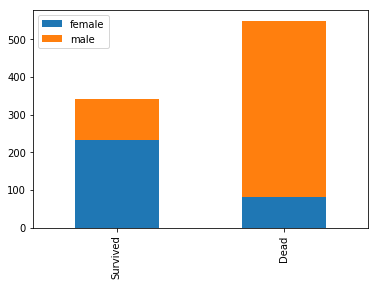

In [9]:
def survived_bar_chart(feature): #feature에 따른 생존 여부를 시각화하는 함수
    #feature에 Sex라면, 성별에 따른 생존여부를 시각화 
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived', 'Dead']
    # df.plot(kind='bar')
    df.plot(kind='bar', stacked=True)
    # print(df)
    # print(type(survived)) 시리즈
#     print(survived)
#     print("="*50)
#     print(dead)
survived_bar_chart('Sex')



In [10]:
# train[train['Survived']==1]['Embarked'].value_counts() #value_counts() 특정 밸류 내 각각의 값을 알고 싶을 때

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


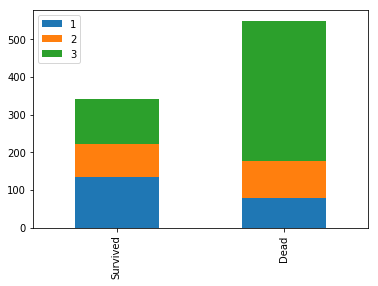

In [11]:
survived_bar_chart('Pclass')
# 카테고리로 구성, 순서가 있음
# groupby, pivot을 이용하여 연산수행
# pclass별 생존율

# pclass 그룹 별 데이터 카운트
# train[['Pclass', 'Survived']]
train[['Pclass', 'Survived']].groupby('Pclass').count()
# pclass 별로 Survived 값들의 총 합을 출력

# Pclass 별로 생존자 수
train[['Pclass', 'Survived']].groupby('Pclass').sum()

# crosstab을 이용한 등실 별 생존자 수
# pd.crosstab(train['Pclass']. train['Survived'])
pd.crosstab(train['Pclass'], train['Survived'])
pd.crosstab(train['Pclass'], train['Survived'], margins=True)
                  
train[['Pclass', 'Survived']].groupby('Pclass').mean()               

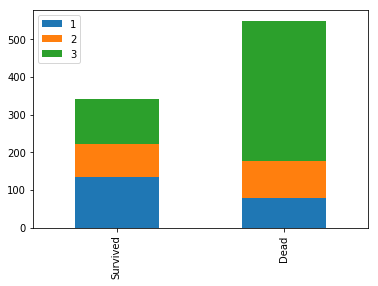

In [12]:
survived_bar_chart('Pclass')

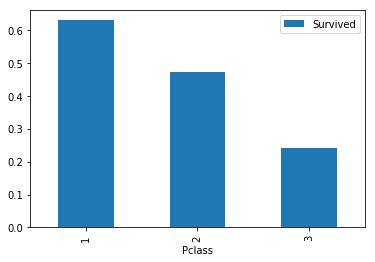

In [13]:
# 등급 별 생존률을 시각화
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
# 모델 만들때 등급 정보는 매우 중요하게 사용됨

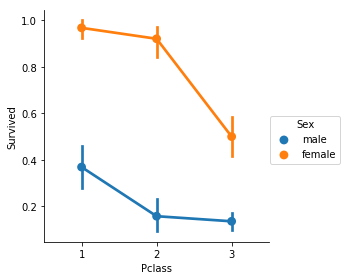

In [14]:
# Sex, Pclass 두 개에 따라 생존의 변화 
sns.factorplot('Pclass', 'Survived', data=train, hue='Sex')

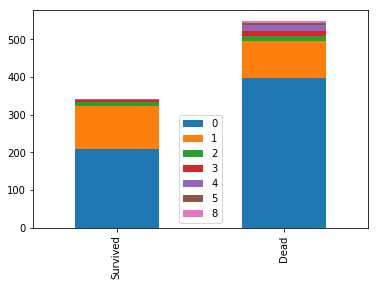

In [15]:
# 형제자매 등 동반탑승객
survived_bar_chart('SibSp')

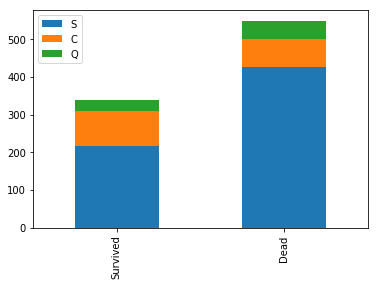

In [16]:
# 선실등급
survived_bar_chart('Embarked')

C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


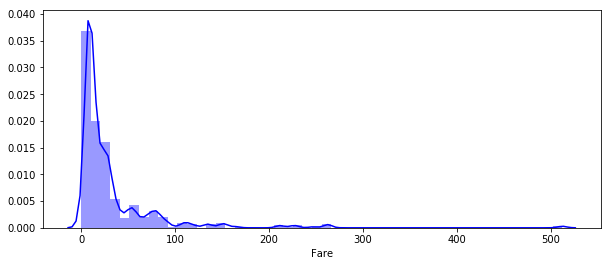

In [17]:
# survived_bar_chart('Fare')
# Fare는 연속데이터 이므로... 막대 바 그래프로 그리면 매우 곤란함
# 연속데이터는 히스토그램으로 그리는게 무난함
fig,ax=plt.subplots(1, 1, figsize=(10,4))
sns.distplot(train['Fare'], ax=ax, color='b')

In [18]:
# Cabin은 NaN이 많으므로 모델에 포함/비포함은 각자 판단
# train['Cabin'].isnull()
# train['Cabin'].isnull().sum() #NaN의 개수
train['Cabin'].isnull().sum()/train.shape[0] #약 77%가 NaN -> 모델링에서 제외



0.7710437710437711

In [19]:
train['Ticket'].value_counts()
# Ticket은 NaN이 없음. Ticket 컬럼의 값에 대한 특성 공학은 앞으로도 계속 고민....

347082              7
1601                7
CA. 2343            7
3101295             6
347088              6
CA 2144             6
382652              5
S.O.C. 14879        5
LINE                4
2666                4
113760              4
17421               4
PC 17757            4
347077              4
113781              4
4133                4
W./C. 6608          4
349909              4
19950               4
239853              3
13502               3
24160               3
29106               3
SC/Paris 2123       3
PC 17760            3
230080              3
371110              3
345773              3
248727              3
347742              3
                   ..
233639              1
392091              1
336439              1
29105               1
367232              1
349236              1
A/4. 34244          1
315093              1
4136                1
345769              1
250651              1
113796              1
240929              1
7540                1
29108     

In [20]:
import re

# print(train_test_data)
# for dataset in train_test_data:  
#     for name in dataset['Name']:  #Ford, Mr, William Neal => Mr.
#         tmp=re.search('(, )([a-zA-Z]+)(.)', name)
#         print(tmp.group(2))

train_test_data = [train,test]
# dataset에 Title 컬럼을 추가하면, 자동으로 train, test에 동일하게 추가됨
for dataset in train_test_data:  
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)')
# print(dataset['Title'])
print(test['Title'])

    
# print("abc1234def".extract('(\d+)').astype(int))
#df['column_name'].str.extract('(\d+)').astype(int)
#주어진 문자열에서 숫자문자를 추출한 후 정수타입으로 변환
    
#     for names in dataset['Name'].str.split(","):
#         print(names[1].split(" ")[1])

#     print(dataset['Name'])
#     dataset['Name']에서 Mr 또는 Mrs만 추출



0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15      Carlo
16         Mr
17         Mr
18       Miss
19     Khalil
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414         y
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [21]:

p=re.compile("[a-z]+")
print(p.match("test"))
print(p.match("1te3st"))
print(p.search("1te3st"))



<_sre.SRE_Match object; span=(0, 4), match='test'>
None
<_sre.SRE_Match object; span=(1, 3), match='te'>


In [22]:
# train['Title'].value_counts()
train['Title'].value_counts()
test['Title'].value_counts()
title_mapping={
    'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'y':3,'Planke':3,'Impe':3,'Mlle':3,'Gordon':3,
    'Col':3,'Major':3,'Pelsmaeker':3,'Jonkheer':3,'Cruyssen':3,'Walle':3,'Mme':3,'Carlo':3,'Ms':3,
    'Mulder':3,'Capt':3,'Steen':3,'Don':3,'Billiard':3,'Velde':3,'Shawah':3,'Messemaeker':3,
    'Melkebeke':3,'der':3,'the':3,}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
# train['Title'].replace(['Ms','Sir'],["Miss",'Mr'], )
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


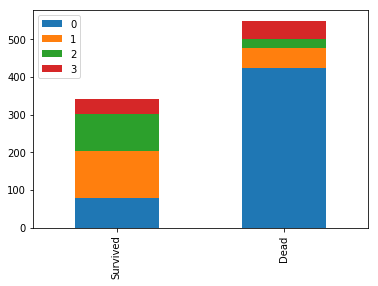

In [25]:
survived_bar_chart('Title')

In [26]:
# train.drop('Name',axis=1, inplace=True) #Name컬럼은 필요없으므로 제거
train

# test.drop('Name',axis=1, inplace=True) #Name컬럼은 필요없으므로 제거

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [27]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.0


In [28]:
#male:0, femail:1
sex_mapping={'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [29]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


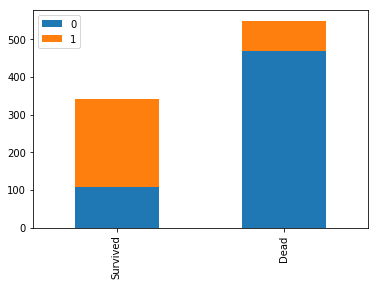

In [30]:
survived_bar_chart("Sex")

In [31]:
train.Age.fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test.Age.fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [32]:
train['Age']
test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10     28.0
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22     36.5
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29     28.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    22.0
409     3.0
410    22.0
411    37.0
412    28.0
413    28.0
414    39.0
415    38.5
416    28.0
417    13.0
Name: Age, Length: 418, dtype: float64

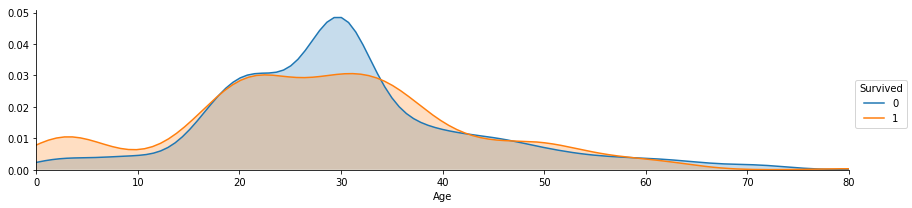

In [33]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(40, 60)

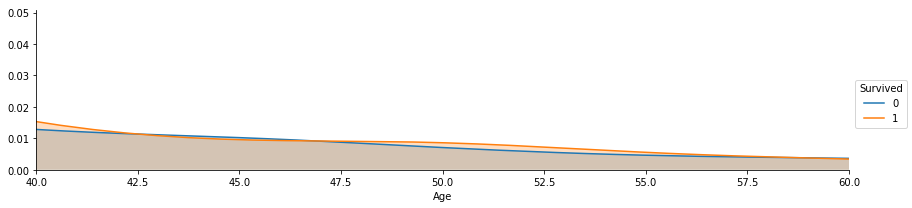

In [34]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          415 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 39.3+ KB


In [37]:
# binning: 구간 나누기 / 연속형을 나눌떄
# child:0, young:1, adult:2, mid-age:3, senior:4
for dataset in train_test_data:
    dataset.loc[dataset['Age']<13, "Age"]=0,
    dataset.loc[ (dataset['Age']>=13) & (dataset['Age']<19),"Age"]=1,
    dataset.loc[ (dataset['Age']>=19) & (dataset['Age']<36),"Age"]=2,
    dataset.loc[ (dataset['Age']>=36) & (dataset['Age']<61),"Age"]=3,
    dataset.loc[ (dataset['Age']>=61), "Age"]=4
#     print(dataset.loc[dataset['Age']<13, "Age"])
#     print(dataset[dataset['Age']<13])



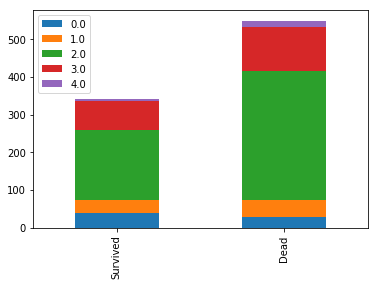

In [38]:
survived_bar_chart('Age')

In [39]:
train['Embarked']
#선실 등급별(1,2,3) 항구(S,C,Q)의 합
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
print(pclass1)
print(pclass2)
print(pclass3)

NameError: name 'pclass1' is not defined

In [40]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


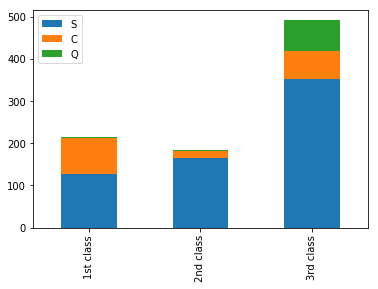

In [41]:
df.plot(kind='bar', stacked=True)

In [42]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
train

# dataset['Embarked']을 참조하여 S->0, C->1, Q->2로 일괄 변환(map함수 적용)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,C,2


In [43]:
embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


(50, 100)

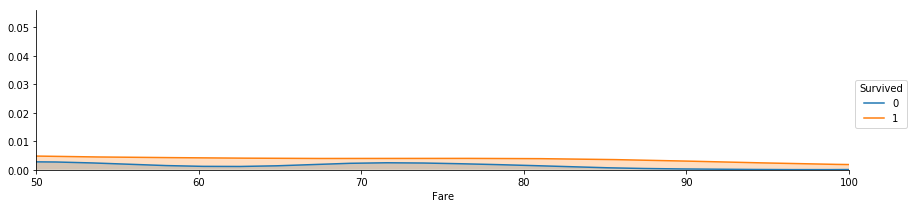

In [45]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
# plt.xlim(0,20) # 0~20사이: 사망이 더 많음 
# plt.xlim(20,40) # 20~40사이: 사망과 생존이 비슷
plt.xlim(50,100)

In [46]:
# 구간을 임의적으로 나누었지만, 추후에는 내공이 쌓이면...표준화를 해보세요
# 의미있는 구간으로 나눠보세요..
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20, "Fare"]=0,
    dataset.loc[ (dataset['Fare']>20) & (dataset['Fare']<=30),"Fare"]=1,
    dataset.loc[ (dataset['Fare']>30) & (dataset['Fare']<=100),"Fare"]=2,
    dataset.loc[ (dataset['Fare']>100), "Fare"]=3

In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2.0,NaN,1,2


In [48]:
train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
D                  3
F33                3
E101               3
C22 C26            3
F G73              2
C123               2
B20                2
B51 B53 B55        2
E25                2
E33                2
B57 B59 B63 B66    2
C92                2
E121               2
F4                 2
C83                2
C126               2
B35                2
B77                2
C78                2
E44                2
C65                2
B5                 2
C93                2
B28                2
D33                2
C68                2
                  ..
E34                1
A34                1
E31                1
B41                1
C101               1
D47                1
D37                1
D56                1
C7                 1
B39                1
C91                1
B71                1
A32                1
C49                1
D48                1
A19                1
B94          

In [49]:
for dataset in train_test_data:
#     dataset['Cabin']
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [50]:
dataset['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12       B
13     NaN
14       E
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24       B
25     NaN
26       B
27     NaN
28       A
29     NaN
      ... 
388    NaN
389    NaN
390      B
391      D
392    NaN
393    NaN
394    NaN
395      C
396    NaN
397      B
398    NaN
399    NaN
400      C
401    NaN
402    NaN
403    NaN
404      D
405      D
406    NaN
407      C
408    NaN
409    NaN
410    NaN
411      C
412    NaN
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [51]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()

In [52]:
Pclass1

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

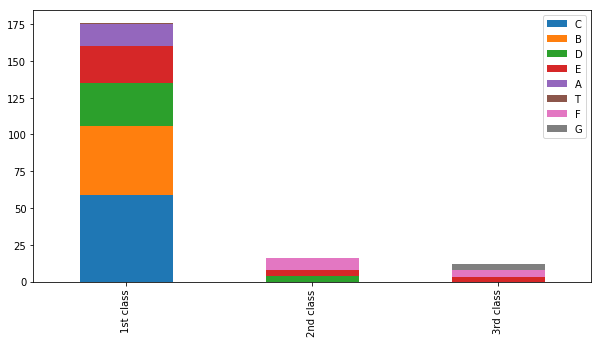

In [53]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [54]:
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [55]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"),inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform("median"),inplace=True)

In [56]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2.0,1.8,1,2


In [57]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

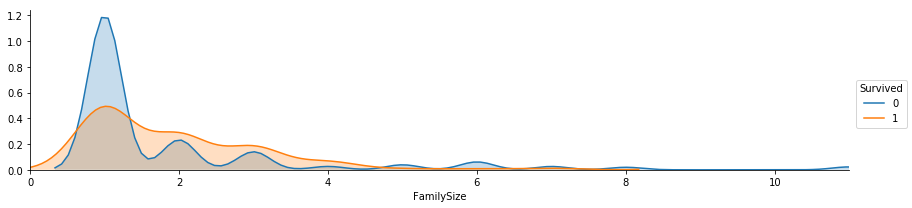

In [58]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [59]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [60]:
train= train.drop(['Ticket','SibSp','Parch'], axis=1)

In [61]:
test= test.drop(['Ticket','SibSp','Parch'], axis=1)

In [62]:
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2.0,0.0,2.0,2,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,4.0,0.0,2.0,2,0.0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0.0,2.0,0,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,0.0,2.0,0,2.0,0.8
5,897,3,"Svensson, Mr. Johan Cervin",0,1.0,0.0,2.0,0,0.0,0.0
6,898,3,"Connolly, Miss. Kate",1,2.0,0.0,2.0,2,1.0,0.0
7,899,2,"Caldwell, Mr. Albert Francis",0,2.0,1.0,2.0,0,0.0,0.8
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1.0,0.0,2.0,1,2.0,0.0
9,901,3,"Davies, Mr. John Samuel",0,2.0,1.0,2.0,0,0.0,0.8


In [63]:
train
train_data=train.drop(['Survived'], axis=1) 

In [64]:
train_data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,0.0,2.0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0.0,2.0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0.0,2.0,0,0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0.0,2.0,2,0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,2.0,1.6,0,0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,1.0,2.0,0,3,1.6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0.0,2.0,0,2,0.8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,2.0,1.8,1,2,0.4


In [65]:
target=train['Survived']

In [66]:
train_data.shape

(891, 10)

In [67]:
target.shape

(891,)

In [68]:
train_data=train_data.drop('PassengerId', axis=1)

In [69]:
train_data.shape

(891, 9)

In [70]:
train_data

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Braund, Mr. Owen Harris",0,2.0,0.0,2.0,0,0,0.4
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,2.0,0.8,1,2,0.4
2,3,"Heikkinen, Miss. Laina",1,2.0,0.0,2.0,0,1,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,2.0,0.8,0,2,0.4
4,3,"Allen, Mr. William Henry",0,2.0,0.0,2.0,0,0,0.0
5,3,"Moran, Mr. James",0,2.0,0.0,2.0,2,0,0.0
6,1,"McCarthy, Mr. Timothy J",0,3.0,2.0,1.6,0,0,0.0
7,3,"Palsson, Master. Gosta Leonard",0,0.0,1.0,2.0,0,3,1.6
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0.0,2.0,0,2,0.8
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,2.0,1.8,1,2,0.4


In [71]:
# 여기까지 특성 공학 작업 종료()


NameError: name 'test_data' is not defined